# Linear Regression - Iris dataset

<font color = 'red'><b>Performing linear regression on Iris data set with sepal length as output variabe and petal length , petal width , sepal width as independent variable</b></font>

In [92]:
import numpy as np
import pandas as pd

import matplotlib as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [93]:
local_path = 'C:/Users/SUSHREETA/Downloads/Data Science/Machine Learning/Supervised leanirng/chap 2 - Linear Regression/assignments/linear reg assignment/'

In [94]:
iris = pd.read_csv(local_path+'iris.csv')
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [95]:
iris.rename(columns={"Sepal.Length":"sepal_length",
                  "Sepal.Width":"sepal_width",
                  "Petal.Length":"petal_length",
                  "Petal.Width":"petal_width"},inplace = True)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [96]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
Species         0
dtype: int64

In [97]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [98]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


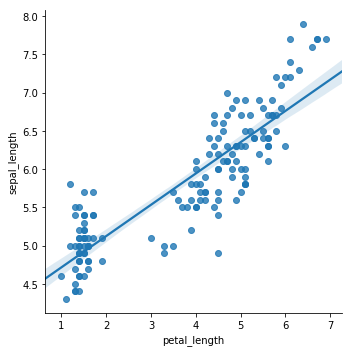

In [101]:
sns.lmplot(data = iris,x='petal_length',y='sepal_length')
#yes there is a direct relation between petalLength and petalWidth

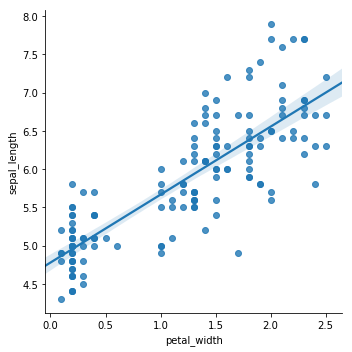

In [102]:
sns.lmplot(data = iris,x='petal_width',y='sepal_length')
#no relation between petalLength and sepalwidth

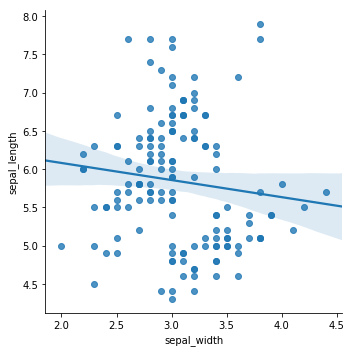

In [103]:
sns.lmplot(data = iris,x='sepal_width',y='sepal_length')
#no relation between sepalwidth and petalwidth

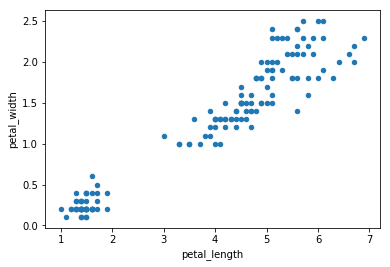

In [105]:
iris.plot(kind = 'scatter' , x='petal_length' , y = 'petal_width')

- It is seen that petal_length and petal_width are directly proportional to sepal_length    
- sepal_width seems to not have any relation with sepal_length    
- petal_length and petal_width are colinear, hence eliminating petal_length     
- for the time being considering sepal_width do not contribute to sepal_length prediction   


Checking the independant variable via box plot to see if there are any outliers and check the spread of each variable

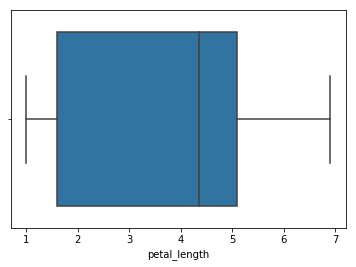

In [118]:
sns.boxplot(iris.petal_length)

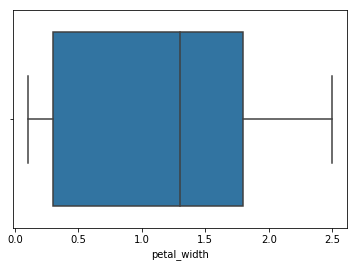

In [119]:
sns.boxplot(iris.petal_width)


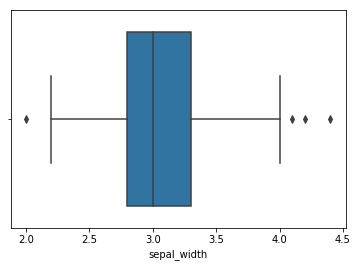

In [111]:
sns.boxplot(iris.sepal_width)


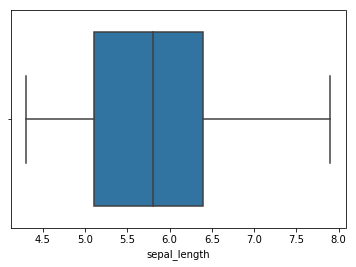

In [112]:
sns.boxplot(iris.sepal_length)

It can be seen from boxplots 
- petal_length and petal_width are having a wide spread of values
- sepal_length and sepal_width are having a narrower spread of values
- petal_length and petal_width are not having any outliers
- sepal_width do have outlier 

In [123]:
#checking the relationship between input and output variable mathematically
input_col = ['petal_length']
output = ['sepal_length']

x = iris[input_col]
y = iris[output]

linreg = LinearRegression()
linreg.fit(X,y)

print(linreg.intercept_)
print(linreg.coef_)

[4.30660342]
[[0.40892228]]


In [124]:
input_col = ['petal_width']
output = ['sepal_length']

x = iris[input_col]
y = iris[output]

linreg = LinearRegression()
linreg.fit(x,y)

print(linreg.intercept_)
print(linreg.coef_)

[4.77762942]
[[0.88858025]]


In [125]:
input_col = ['sepal_width']
output = ['sepal_length']

x = iris[input_col]
y = iris[output]

linreg = LinearRegression()
linreg.fit(x,y)

print(linreg.intercept_)
print(linreg.coef_)

[6.52622255]
[[-0.22336106]]


In [126]:
input_col = ['petal_width','petal_length']
output = ['sepal_length']

x = iris[input_col]
y = iris[output]

linreg = LinearRegression()
linreg.fit(x,y)

print(linreg.intercept_)
print(linreg.coef_)

[4.19058243]
[[-0.31955056  0.54177715]]


In [127]:
input_col = ['petal_width','petal_length','sepal_width']
output = ['sepal_length']

x = iris[input_col]
y = iris[output]

linreg = LinearRegression()
linreg.fit(x,y)

print(linreg.intercept_)
print(linreg.coef_)

[1.85599749]
[[-0.55648266  0.70913196  0.65083716]]


Above checks shows that 
- the coeff of petal_width is tightly couples with sepal_length
- the independant variables are not that independant as the coefficients keep on changing with addition of each new independant variable togther in model. Hence there existis multicoliearity